In [1]:
# Importing all the dependencies
%load_ext autoreload
%autoreload 2

# Check if running in Colab
in_colab = True

import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_absolute_error, r2_score, accuracy_score, classification_report
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, VotingClassifier, StackingClassifier
from sklearn.multioutput import MultiOutputRegressor
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.neural_network import MLPRegressor, MLPClassifier
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.svm import SVR
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.svm import SVC, LinearSVC
import xgboost as xgb
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

In [10]:
df = pd.read_csv('StudentsPerformance.csv')
df_original = df.copy()

gender_encoder = LabelEncoder()
test_preparation_encoder = LabelEncoder()
race_ethnicity_encoder = LabelEncoder()
parental_education_encoder = LabelEncoder()
lunch_encoder = LabelEncoder()

In [11]:
df['gender_encoded'] = gender_encoder.fit_transform(df['gender'])
df['test_preparation_encoded'] = test_preparation_encoder.fit_transform(df['test preparation course'])
df['race_ethnicity_encoded'] = race_ethnicity_encoder.fit_transform(df['race/ethnicity'])
df['parental_education_encoded'] = parental_education_encoder.fit_transform(df['parental level of education'])
df['lunch_encoded'] = lunch_encoder.fit_transform(df['lunch'])

In [12]:
df = df.drop(columns=['gender', 'test preparation course', 'race/ethnicity', 'parental level of education', 'lunch'])

# **Para regresion:**

## **Con scaler:**

In [318]:
numerical_columns = ["math score", "reading score", "writing score"]
numerical_data = df[numerical_columns]

scaler = StandardScaler()
scaled_data = scaler.fit_transform(numerical_data)

In [128]:
df_scaled = pd.DataFrame(data=scaled_data, columns=numerical_columns)
df[numerical_columns] = df_scaled
df_scaled

,math score,reading score,writing score
0,0.390024,0.193999,0.391492
1,0.192076,1.427476,1.313269
2,1.577711,1.770109,1.642475
3,-1.259543,-0.833899,-1.583744
4,0.653954,0.605158,0.457333
...,...,...,...
995,1.445746,2.044215,1.774157
996,-0.269803,-0.970952,-0.859491
997,-0.467751,0.125472,-0.201079
998,0.126093,0.605158,0.589015


In [321]:
x = df.drop(['math score','reading score','writing score'], axis=1)

y = df[['math score','reading score','writing score']] 

In [322]:
y

,math score,reading score,writing score
0,72,72,74
1,69,90,88
2,90,95,93
3,47,57,44
4,76,78,75
...,...,...,...
995,88,99,95
996,62,55,55
997,59,71,65
998,68,78,77


## **Eleccion variables a predecir**

**Se escogio al final predecir math y writing usando reading.**

Predecir reading y writing.

In [323]:
x = df.drop(['reading score','writing score'], axis=1)

y = df[['reading score', 'writing score']]

# RFG
# 0.8939, 0.8171, 5.12
# LR
# 0.8494, 0.8580, 4.494
# GBT
# 0.8908, 0.8385, 4.82
# KNN
# 0.7973, 0.7516, 6.03
# MLP
# 0.8491, 0.8580, 4.5
# SVR
# 0.8488, 0.8571, 4.48

Predecir math y reading

In [404]:
x = df.drop(['math score','reading score'], axis=1)

y = df[['math score', 'reading score']]

# RFG
# 0.9159, 0.8712, 4.38
# LR
# 0.8856, 0.8972, 3.957
# GBT
# 0.9171, 0.8914, 4.07
# KNN
# 0.9963, 0.8345, 4.92
# MLP
# 0.8846, 0.8948, 3.97
# SVR
# 0.8849, 0.8969, 3.95

Predecir math y writing

In [405]:
x = df.drop(['math score','writing score'], axis=1)

y = df[['math score', 'writing score']]

# RFG
# 0.9188, 0.8722, 4.25
# LR
# 0.88, 0.8934, 3.914
# GBT
# 0.9064, 0.8904, 3.99
# KNN
# 0.8633, 0.8355, 4.80
# MLP
# 0.88, 0.8934, 3.91
# SVR
# 0.8795, 0.8914, 3.94

# **Para clasificacion**:

Predecir reading y writing.

In [15]:
df['math pass'] = df['math score'] >= 70
df['reading pass'] = df['reading score'] >= 70
df['writing pass'] = df['writing score'] >= 70

df['math pass'] = df['math pass'].apply(lambda x: 1 if x else 0)
df['reading pass'] = df['reading pass'].apply(lambda x: 'Pass' if x else 'Fail')
df['writing pass'] = df['writing pass'].apply(lambda x: 'Pass' if x else 'Fail')

In [16]:
x = df.drop(['math score', 'reading score','writing score', 'reading pass', 'writing pass'], axis=1)

y_reading = df[['reading pass']]
y_writing = df[['writing pass']]

# Datos organizados

In [406]:
y

,math score,writing score
0,72,74
1,69,88
2,90,93
3,47,44
4,76,75
...,...,...
995,88,95
996,62,55
997,59,65
998,68,77


In [409]:
x

,reading score,gender_encoded,test_preparation_encoded,race_ethnicity_encoded,parental_education_encoded,lunch_encoded
0,72,0,1,1,1,1
1,90,0,0,2,4,1
2,95,0,1,1,3,1
3,57,1,1,0,0,0
4,78,1,1,2,4,1
...,...,...,...,...,...,...
995,99,0,0,4,3,1
996,55,1,1,2,2,0
997,71,0,0,2,2,0
998,78,0,0,3,4,1


In [410]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)

In [419]:
y_train

,math score,writing score
382,79,71
994,63,62
982,79,86
47,66,76
521,91,84
...,...,...
767,76,60
72,41,48
908,67,72
235,80,77


In [420]:
x_train

,reading score,gender_encoded,test_preparation_encoded,race_ethnicity_encoded,parental_education_encoded,lunch_encoded
382,81,1,1,2,3,0
994,63,1,1,0,2,1
982,85,1,0,1,5,1
47,71,0,1,2,2,1
521,86,0,1,2,0,1
...,...,...,...,...,...,...
767,62,1,0,1,2,1
72,51,0,1,0,0,0
908,75,0,1,2,1,0
235,75,1,1,3,0,1


# **Exploracion datos**

In [20]:
df_original

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


In [14]:
df_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


**Distribucion del nivel de educacion de los padres**

C:\Users\Wilmer Soto\AppData\Local\Temp\ipykernel_31812\3555920655.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='parental level of education',data=df_original,palette='inferno')


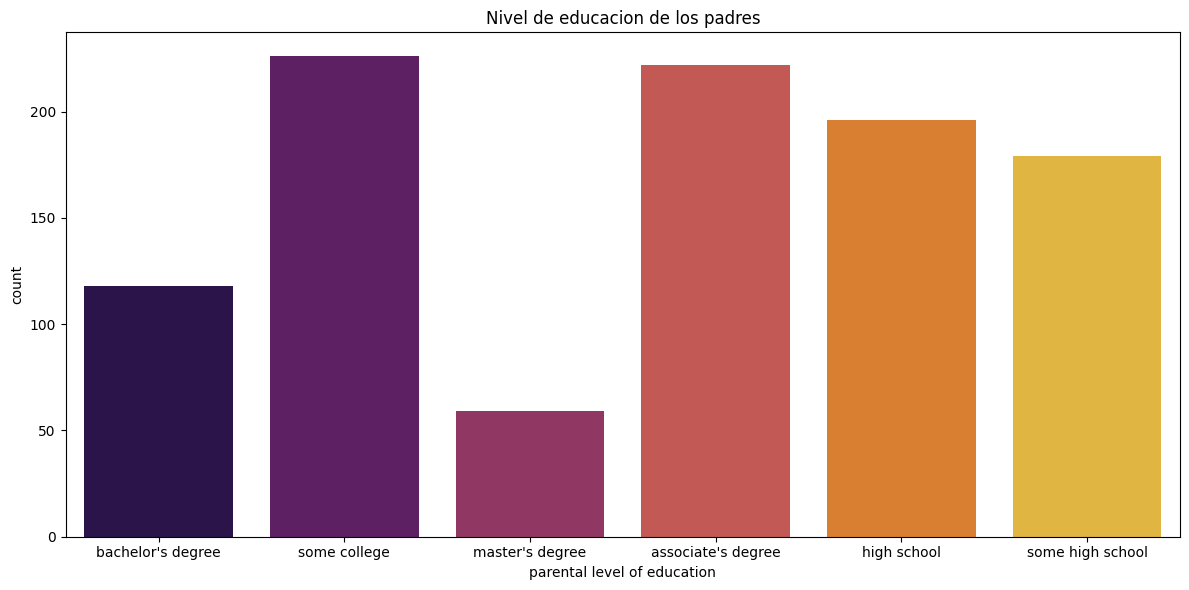

In [53]:
plt.figure(figsize=(12,6))
plt.title('Nivel de educacion de los padres')
sns.countplot(x='parental level of education',data=df_original,palette='inferno')
plt.tight_layout()

**Distribucion de curso de preparacion para los examenes**

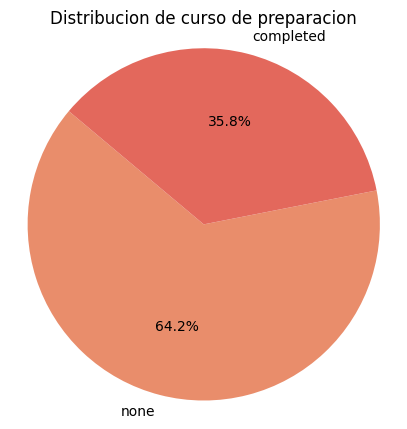

In [47]:
test_prep_counts = df_original['test preparation course'].value_counts()

labels = test_prep_counts.index.tolist()
values = test_prep_counts.values.tolist()

plt.figure(figsize=(5, 5))
plt.pie(values, labels=labels, autopct='%1.1f%%', startangle=140) 
plt.title('Distribucion de curso de preparacion')
plt.axis('equal')
plt.show()


**Visualizacion de la relacion entre algunas variables de entrada y salida.**

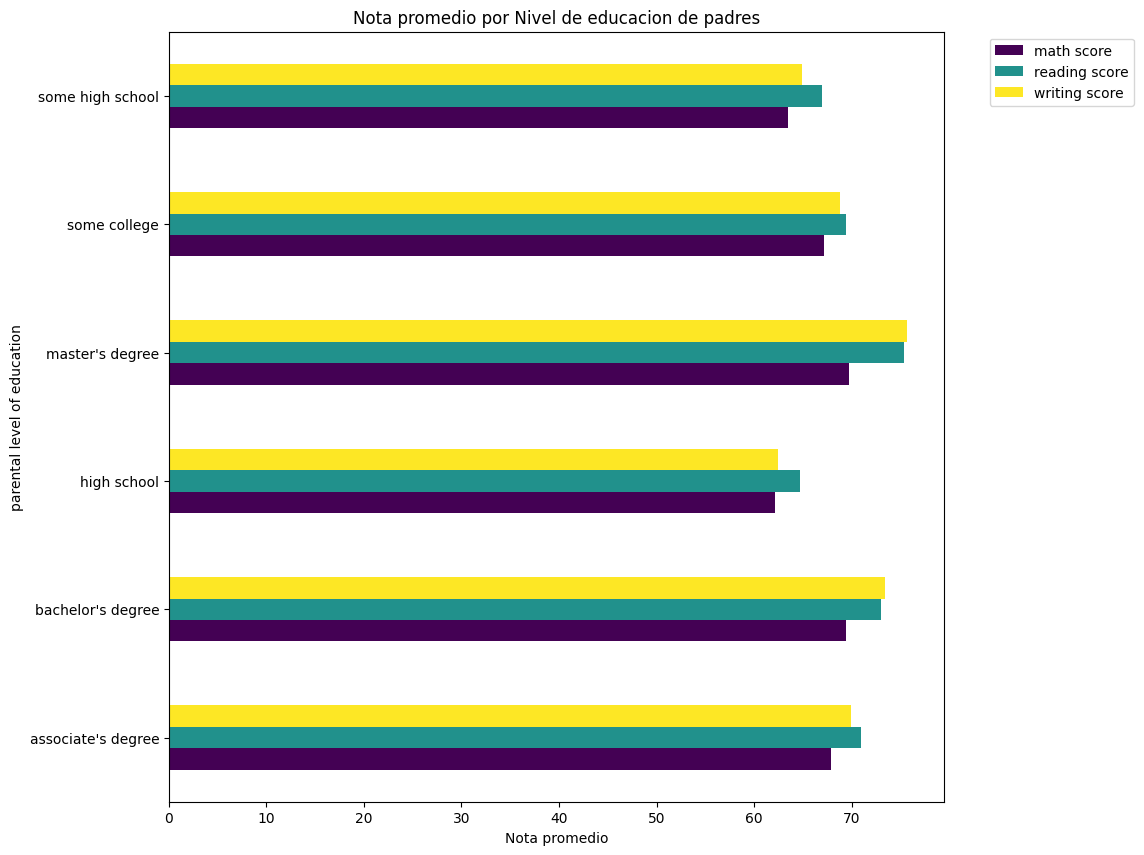

In [38]:
score_means = df_original.groupby('parental level of education')[['math score', 'reading score', 'writing score']].mean()

score_means.plot(kind='barh', figsize=(10, 10), colormap='viridis')
plt.xlabel('Nota promedio')
plt.title('Nota promedio por Nivel de educacion de padres')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

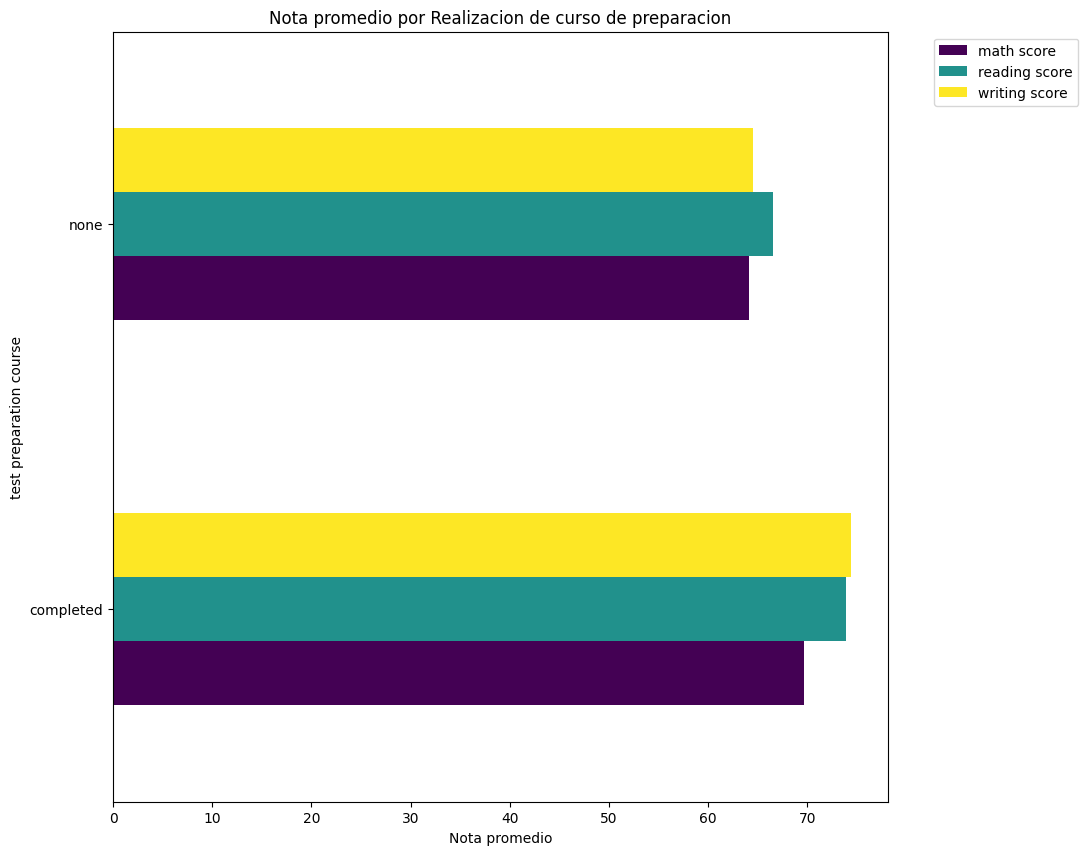

In [39]:
score_means = df_original.groupby('test preparation course')[['math score', 'reading score', 'writing score']].mean()

score_means.plot(kind='barh', figsize=(10, 10), colormap='viridis')
plt.xlabel('Nota promedio')
plt.title('Nota promedio por Realizacion de curso de preparacion')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

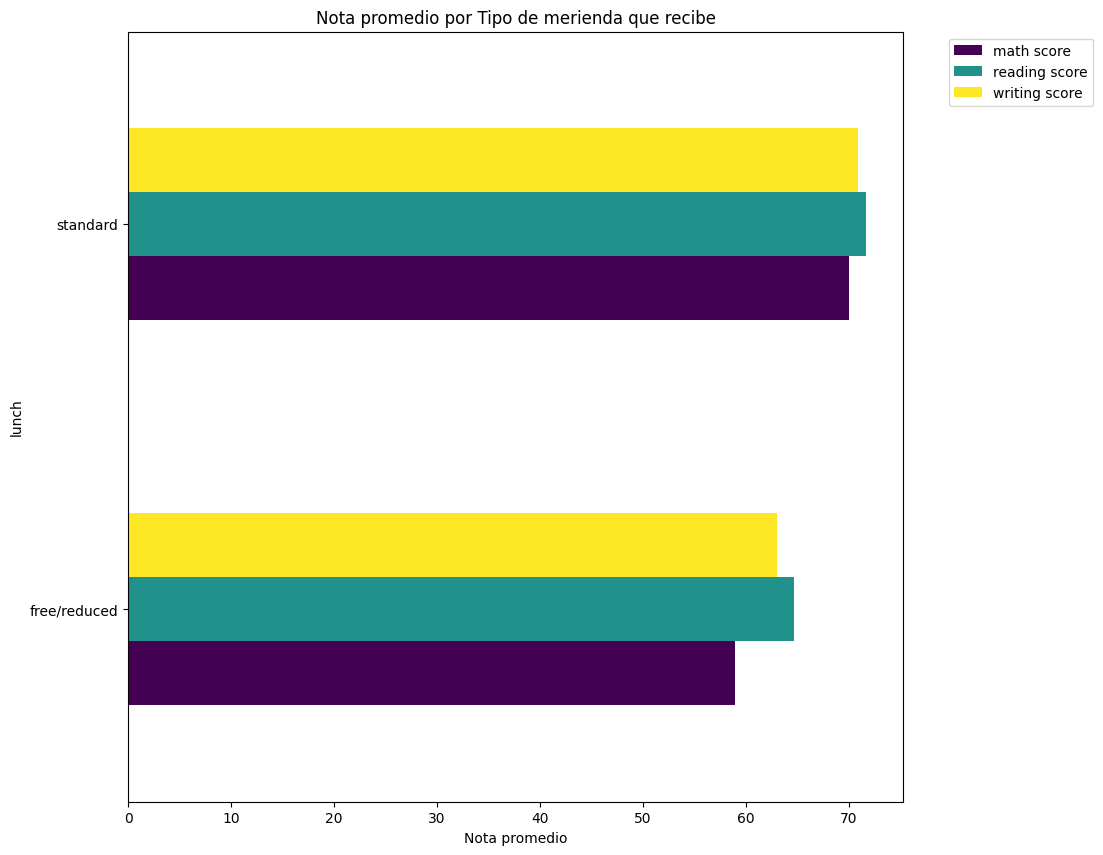

In [57]:
score_means = df_original.groupby('lunch')[['math score', 'reading score', 'writing score']].mean()

score_means.plot(kind='barh', figsize=(10, 10), colormap='viridis')
plt.xlabel('Nota promedio')
plt.title('Nota promedio por Tipo de merienda que recibe')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

**Correlacion entre las notas finales**

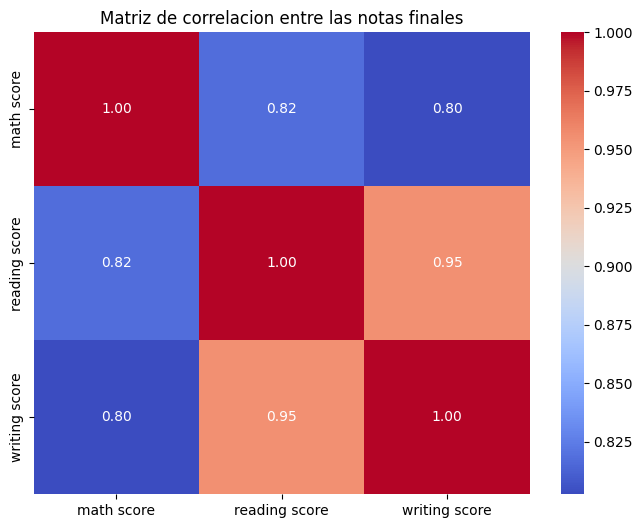

In [41]:
scores = df_original[['math score', 'reading score', 'writing score']]

correlation_matrix = scores.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', annot_kws={"size": 10})
plt.title('Matriz de correlacion entre las notas finales')
plt.show()

Se observa que la mayor correlacion existe entre 'math score' y 'writing score' con 'reading score'.

Con base en esto se decidio predecir math y writing usando reading.

# **Regression**

**Funcion para evaluar los modelos**

In [329]:
def model_scoring(best_estimator, X, Y, fit):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=1)
    
    if fit:
        best_estimator.fit(X_train, Y_train)
    Y_pred_train = best_estimator.predict(X_train)
    Y_pred_test = best_estimator.predict(X_test)

    train_r2 = r2_score(Y_train, Y_pred_train)
    test_r2 = r2_score(Y_test, Y_pred_test)
    mae_score = mean_absolute_error(Y_test, Y_pred_test)

    print(f'R2 Train : {train_r2}')
    print(f'R2 Test : {test_r2}')
    print(f'MAE: {mae_score}')

## **Random forest**

In [330]:
param_grid_rfg = {
    'n_estimators': [50, 100, 200, 300],
    'max_features': [3, 6, 9],
    'max_depth': [None, 10, 20, 30, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False],
    'ccp_alpha' :[0.05, 0.1, 0.15]
}

In [331]:
rfg_model = RandomForestRegressor()
grid_search_rfg = GridSearchCV(estimator=rfg_model, param_grid=param_grid_rfg, cv=5, n_jobs=-1, scoring='r2')

In [201]:
grid_search_rfg.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'ccp_alpha': [0.05, 0.1, 0.15],
                         'max_depth': [None, 10, 20, 30, 50],
                         'max_features': [3, 6, 9],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200, 300]},
             scoring='r2')

In [231]:
best_estimator_rfg = grid_search_rfg.best_estimator_
best_estimator_rfg

RandomForestRegressor(ccp_alpha=0.1, max_depth=30, max_features=3,
                      min_samples_leaf=2, n_estimators=50)

In [374]:
model_scoring(best_estimator_rfg, x, y, True)

R2 Train : 0.8939042714954338
R2 Test : 0.8171311282244862
MAE: 5.126772415148206


## **Gradient Boosting**

In [332]:
param_grid_gbt = {
    'estimator__n_estimators': [100, 200, 300],
    'estimator__max_depth': [3, 4, 5],
    'estimator__min_samples_split': [2, 5, 10],
    'estimator__max_features': [1,3,5]
}

In [333]:
gbt_model = MultiOutputRegressor(GradientBoostingRegressor())
grid_search_gbt = GridSearchCV(estimator=gbt_model, param_grid=param_grid_gbt, cv=5, scoring='r2', n_jobs=-1)

In [334]:
grid_search_gbt.fit(x_train, y_train)
best_estimator_gbt = grid_search_gbt.best_estimator_
best_estimator_gbt

MultiOutputRegressor(estimator=GradientBoostingRegressor(max_features=5))

In [335]:
best_estimator_gbt = grid_search_gbt.best_estimator_
best_estimator_gbt

MultiOutputRegressor(estimator=GradientBoostingRegressor(max_features=5))

In [336]:
model_scoring(best_estimator_gbt, x, y, True)

R2 Train : 0.8908128360865313
R2 Test : 0.8385447887964541
MAE: 4.829155093743161


## **Artificial Neural Networks**

In [414]:
param_grid_mlp = {
    'hidden_layer_sizes': [(50, 50),(100,100),(50, 100, 50)],
    'activation': ['identity','relu', 'tanh', 'logistic'],
    'solver': ['adam', 'lbfgs'],
    'early_stopping': [True, False],
    'max_iter' : [200, 400, 500]
    }

In [415]:
mlp_model = MLPRegressor()

grid_search_ann = GridSearchCV(estimator=mlp_model, param_grid=param_grid_mlp, scoring='r2', cv=5, n_jobs=-1)

In [416]:
grid_search_ann.fit(x_train,y_train)

c:\Users\Wilmer Soto\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


GridSearchCV(cv=5, estimator=MLPRegressor(), n_jobs=-1,
             param_grid={'activation': ['identity', 'relu', 'tanh', 'logistic'],
                         'early_stopping': [True, False],
                         'hidden_layer_sizes': [(50, 50), (100, 100),
                                                (50, 100, 50)],
                         'max_iter': [200, 400, 500],
                         'solver': ['adam', 'lbfgs']},
             scoring='r2')

In [417]:
best_estimator_ann = grid_search_ann.best_estimator_
best_estimator_ann

MLPRegressor(activation='identity', early_stopping=True,
             hidden_layer_sizes=(50, 100, 50), max_iter=400, solver='lbfgs')

In [418]:
model_scoring(best_estimator_ann, x, y, True)

R2 Train : 0.8800460504603567
R2 Test : 0.893410613988584
MAE: 3.9144356711809474


c:\Users\Wilmer Soto\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


## **Linear regression**

In [339]:
param_grid_lr = {
    'fit_intercept': [True, False],  # Whether to calculate the intercept
    'copy_X': [True, False],  # Whether to normalize the input features
}

In [340]:
# Create and train separate linear regression models for each score
lr_model = LinearRegression()
grid_search_lr = GridSearchCV(lr_model, param_grid_lr, scoring='r2', cv=5, n_jobs=-1)

In [341]:
grid_search_lr.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=LinearRegression(), n_jobs=-1,
             param_grid={'copy_X': [True, False],
                         'fit_intercept': [True, False]},
             scoring='r2')

In [342]:
best_estimator_lr = grid_search_lr.best_estimator_
best_estimator_lr

LinearRegression()

In [343]:
model_scoring(best_estimator_lr, x, y, True)

R2 Train : 0.8494004302085802
R2 Test : 0.8580636942281862
MAE: 4.494039331246356


## **KNN**

In [344]:
param_grid_knn = {
    'n_neighbors': [5, 10, 15, 20, 25],
    'p': [1, 2],
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'leaf_size': [10, 30, 60]
}

In [345]:
knn_model = KNeighborsRegressor()
grid_search_knn = GridSearchCV(estimator=knn_model, param_grid=param_grid_knn, cv=5, n_jobs=-1, scoring='r2')

In [346]:
grid_search_knn.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsRegressor(), n_jobs=-1,
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'leaf_size': [10, 30, 60],
                         'n_neighbors': [5, 10, 15, 20, 25], 'p': [1, 2],
                         'weights': ['uniform', 'distance']},
             scoring='r2')

In [347]:
best_estimator_knn = grid_search_knn.best_estimator_
best_estimator_knn

KNeighborsRegressor(leaf_size=60, n_neighbors=10, p=1)

In [348]:
model_scoring(best_estimator_knn, x, y, True)

R2 Train : 0.7973983029353082
R2 Test : 0.7516751100362979
MAE: 6.039999999999999


## **SVR**

In [223]:
param_grid_svm = {
    'kernel': ['linear', 'rbf', 'poly'], 
    'C': [0.1, 1, 10],  
    'gamma': ['scale', 'auto'] + [0.001, 0.01, 0.1, 1],
    'epsilon': [0.1, 0.2, 0.3]
}

In [224]:
svr_model = MultiOutputRegressor(SVR())
grid_search_svr = GridSearchCV(svr_model, param_grid_svm, scoring='r2', cv=5, n_jobs=-1)

In [ ]:
grid_search_svr.fit(x_train, y_train)

In [89]:
best_estimator_svr = grid_search_svr.best_estimator_
best_estimator_svr

SVR(C=10, epsilon=0.3, kernel='linear')

In [226]:
model_scoring(best_estimator_svr, x, y,False)

R2 Train : 0.8795019333082028
R2 Test : 0.8919416867813252
MAE: 3.9472261072996337


## **Resultados finales de tres modelos escogidos**

Se escogio GBT, MLP y SVM como modelos a probar para este problema de regresion.

Sus metricas de validacion finales fueron estas.

In [55]:
resultados_finales = {
    'R2 Train': [0.9064, 0.88, 0.8795],
    'R2 Test': [0.8904, 0.8934, 0.8914],
    'MAE Test': [3.99, 3.91, 3.94]
}

index = ['GBT', 'MLP', 'SVM']

# Create a DataFrame
df = pd.DataFrame(resultados_finales, index=index)

print(df)

     R2 Train  R2 Test  MAE Test
GBT    0.9064   0.8904      3.99
MLP    0.8800   0.8934      3.91
SVM    0.8795   0.8914      3.94


Se opto al final escoger a GBT como modelo principal debido a que tiene valores de R2 ligeramente mas alto que el resto y debido a que este es mas 'sencillo' que los demas modelos.

# **Classification**

## **Random forest classifier**

In [599]:
param_grid_rfc = {
    'n_estimators': [100, 200, 300],      
    'criterion': ['gini', 'entropy'],    
    'max_depth': [None, 10, 20, 30],     
    'min_samples_split': [2, 5, 10],  
    'max_features': [None, 1, 3, 5],
    'class_weight': [None, 'balanced'] 
}

In [600]:
rfc_model = RandomForestClassifier()
grid_search_rfc = GridSearchCV(estimator=rfc_model, param_grid=param_grid_rfc, cv=5, n_jobs=-1, scoring='accuracy')

In [601]:
grid_search_rfc.fit(x_train, y_train)

c:\Users\Wilmer Soto\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'class_weight': [None, 'balanced'],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 10, 20, 30],
                         'max_features': [None, 1, 3, 5],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             scoring='accuracy')

In [602]:
best_estimator_rfc = grid_search_rfc.best_estimator_
best_estimator_rfc

RandomForestClassifier(criterion='entropy', max_depth=30, max_features=1,
                       min_samples_split=10, n_estimators=200)

In [429]:
test_rfc = RandomForestClassifier(criterion='entropy', max_depth=10, max_features=1,min_samples_split=10, n_estimators=300)

test_rfc.fit(x_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=10, max_features=1,
                       min_samples_split=10, n_estimators=300)

In [604]:
best_estimator_rfc.fit(x_train, y_train)

c:\Users\Wilmer Soto\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestClassifier(criterion='entropy', max_depth=30, max_features=1,
                       min_samples_split=10, n_estimators=200)

In [605]:
y_pred = best_estimator_rfc.predict(x_test)
math_accuracy = accuracy_score(y_test, y_pred)
print(math_accuracy)
print("Math Classification Report:\n", classification_report(y_test, y_pred))

0.78
Math Classification Report:
               precision    recall  f1-score   support

        Fail       0.76      0.78      0.77        95
        Pass       0.80      0.78      0.79       105

    accuracy                           0.78       200
   macro avg       0.78      0.78      0.78       200
weighted avg       0.78      0.78      0.78       200



## **KNN**

In [441]:
param_grid_knnc = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'p': [1, 2],
    'leaf_size': [20, 30, 40],
}

In [454]:
knnclass_model = KNeighborsClassifier()
gs_knnclass = GridSearchCV(estimator=knnclass_model, param_grid=param_grid_knnc, cv=5, n_jobs=-1, scoring='accuracy')

In [455]:
gs_knnclass.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'leaf_size': [20, 30, 40],
                         'n_neighbors': [3, 5, 7, 9, 11], 'p': [1, 2],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [456]:
best_knnc = gs_knnclass.best_estimator_
best_knnc

KNeighborsClassifier(algorithm='brute', leaf_size=20, n_neighbors=11)

In [458]:
best_knnc.fit(x_train, y_train)

KNeighborsClassifier(algorithm='brute', leaf_size=20, n_neighbors=11)

In [459]:
y_pred = best_knnc.predict(x_test)
math_accuracy = accuracy_score(y_test, y_pred)
print(math_accuracy)
print("Math Classification Report:\n", classification_report(y_test, y_pred))

0.8
Math Classification Report:
               precision    recall  f1-score   support

        Fail       0.85      0.82      0.83       122
        Pass       0.73      0.77      0.75        78

    accuracy                           0.80       200
   macro avg       0.79      0.79      0.79       200
weighted avg       0.80      0.80      0.80       200



## **Naive bayes**

In [113]:
param_grid_nb = {
    'alpha': [0.1, 0.5, 1.0, 1.5],
    'fit_prior': [True, False],
    'class_prior': [None, [0.3, 0.7], [0.4, 0.6]],
}

grid_search_nb = GridSearchCV(MultinomialNB(), param_grid_nb, cv=5, scoring='accuracy', n_jobs=-1)
grid_search_nb.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=MultinomialNB(), n_jobs=-1,
             param_grid={'alpha': [0.1, 0.5, 1.0, 1.5],
                         'class_prior': [None, [0.3, 0.7], [0.4, 0.6]],
                         'fit_prior': [True, False]},
             scoring='accuracy')

In [118]:
best_nb = grid_search_nb.best_estimator_
best_nb

MultinomialNB(alpha=0.1)

In [123]:
best_nb.fit(x_train, y_train)
y_pred = best_nb.predict(x_test)

# Evaluate the model using accuracy or other classification metrics
math_accuracy = accuracy_score(y_test, y_pred)

# You can also generate a classification report for more details
print(math_accuracy)
print("Math Classification Report:\n", classification_report(y_test, y_pred))

0.615
Math Classification Report:
               precision    recall  f1-score   support

        Fail       0.63      0.88      0.74       122
        Pass       0.52      0.21      0.29        78

    accuracy                           0.61       200
   macro avg       0.57      0.54      0.51       200
weighted avg       0.59      0.61      0.56       200



## **SVC**

In [503]:
param_grid_svm = {'estimator__C': [1, 10, 100], 
              'estimator__gamma': [1,0.1,0.01],
              'estimator__kernel': ['rbf', 'poly', 'sigmoid'],
              'estimator__probability' : [True]}

svm = SVC()
grid_search_svc = GridSearchCV(svm, param_grid_svm, cv=5, scoring='accuracy', n_jobs=-1)

In [ ]:
grid_search_svc.fit(x_train, y_train)

In [228]:
best_svm = grid_search_svc.best_estimator_
best_svm

SVC(C=100, gamma=0.001, kernel='sigmoid')

In [212]:
best_svm.fit(x_train, y_train)

SVC(C=100, gamma=0.001, kernel='sigmoid')

In [597]:
y_pred = best_svm.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
classification = classification_report(y_test, y_pred)
print(accuracy)
print("Classification Report:\n")
print(classification)

0.775
Classification Report:

              precision    recall  f1-score   support

        Fail       0.70      0.91      0.79        95
        Pass       0.88      0.66      0.75       105

    accuracy                           0.78       200
   macro avg       0.79      0.78      0.77       200
weighted avg       0.80      0.78      0.77       200



In [230]:
y_pred = best_svm.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
classification = classification_report(y_test, y_pred)
print(accuracy)
print("Classification Report:\n")
print(classification)

0.695
Classification Report:

              precision    recall  f1-score   support

        Fail       0.75      0.75      0.75       122
        Pass       0.61      0.62      0.61        78

    accuracy                           0.69       200
   macro avg       0.68      0.68      0.68       200
weighted avg       0.70      0.69      0.70       200



## **LinearSVC**

In [528]:
param_grid_svc = {
    'C': [0.01, 0.1, 1.0, 10.0],
    'loss': ['hinge', 'squared_hinge'], 
    'tol': [1e-4, 1e-3, 1e-2]
}

In [529]:
svm_math = LinearSVC()
grid_search_lsvc = GridSearchCV(estimator=svm_math, param_grid=param_grid_svc, cv=5, scoring='accuracy', n_jobs=-1)

In [530]:
grid_search_lsvc.fit(x_train, y_train)

c:\Users\Wilmer Soto\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Wilmer Soto\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
c:\Users\Wilmer Soto\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


GridSearchCV(cv=5, estimator=LinearSVC(), n_jobs=-1,
             param_grid={'C': [0.01, 0.1, 1.0, 10.0],
                         'loss': ['hinge', 'squared_hinge'],
                         'tol': [0.0001, 0.001, 0.01]},
             scoring='accuracy')

In [531]:
best_lsvc = grid_search_lsvc.best_estimator_
best_lsvc

LinearSVC(C=10.0)

In [532]:
best_lsvc.fit(x_train, y_train)

c:\Users\Wilmer Soto\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Wilmer Soto\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
c:\Users\Wilmer Soto\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LinearSVC(C=10.0)

In [533]:
y_pred = best_lsvc.predict(x_test)
math_accuracy = accuracy_score(y_test, y_pred)
print(math_accuracy)
print("Math Classification Report:\n", classification_report(y_test, y_pred))

0.805
Math Classification Report:
               precision    recall  f1-score   support

        Fail       0.79      0.81      0.80        95
        Pass       0.82      0.80      0.81       105

    accuracy                           0.81       200
   macro avg       0.80      0.81      0.80       200
weighted avg       0.81      0.81      0.81       200



## **MLP Classifier**

In [534]:
param_grid_mlpc = {
    'hidden_layer_sizes': [(50, 50), (100, 100)],
    'activation': ['logistic', 'tanh', 'relu'],
    'solver': ['lbfgs', 'sgd', 'adam'],
    'learning_rate': ['constant', 'invscaling', 'adaptive'],
    'early_stopping': [True, False],
}

In [535]:
mlp_classmodel = MLPClassifier()
gs_mlpclass = GridSearchCV(estimator=mlp_classmodel, param_grid=param_grid_mlpc, cv=5, n_jobs=-1, scoring='accuracy')

In [536]:
gs_mlpclass.fit(x_train, y_train)

c:\Users\Wilmer Soto\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1102: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GridSearchCV(cv=5, estimator=MLPClassifier(), n_jobs=-1,
             param_grid={'activation': ['logistic', 'tanh', 'relu'],
                         'early_stopping': [True, False],
                         'hidden_layer_sizes': [(50, 50), (100, 100)],
                         'learning_rate': ['constant', 'invscaling',
                                           'adaptive'],
                         'solver': ['lbfgs', 'sgd', 'adam']},
             scoring='accuracy')

In [537]:
gs_mlpclass.best_estimator_

MLPClassifier(activation='tanh', hidden_layer_sizes=(50, 50),
              learning_rate='adaptive')

In [538]:
best_mlpc = gs_mlpclass.best_estimator_.fit(x_train, y_train)

c:\Users\Wilmer Soto\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1102: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Wilmer Soto\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [539]:
y_math_pred = best_mlpc.predict(x_test)
math_accuracy = accuracy_score(y_test, y_math_pred)
print(math_accuracy)
print("Math Classification Report:\n", classification_report(y_test, y_math_pred))

0.8
Math Classification Report:
               precision    recall  f1-score   support

        Fail       0.78      0.81      0.79        95
        Pass       0.82      0.79      0.81       105

    accuracy                           0.80       200
   macro avg       0.80      0.80      0.80       200
weighted avg       0.80      0.80      0.80       200



## **Gaussian NB**

In [591]:
param_grid_gnb = {
    'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5, 1e-4, 1e-3],
}

In [592]:
gnb_classmodel = GaussianNB()
gs_gnbclass = GridSearchCV(estimator=gnb_classmodel, param_grid=param_grid_gnb, cv=5, n_jobs=-1, scoring='accuracy')

In [593]:
gs_gnbclass.fit(x_train, y_train)

c:\Users\Wilmer Soto\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GridSearchCV(cv=5, estimator=GaussianNB(), n_jobs=-1,
             param_grid={'var_smoothing': [1e-09, 1e-08, 1e-07, 1e-06, 1e-05,
                                           0.0001, 0.001]},
             scoring='accuracy')

In [594]:
gs_gnbclass.best_score_
best_gnb = gs_gnbclass.best_estimator_
best_gnb

GaussianNB()

In [595]:
best_gnb.fit(x_train, y_train)
y_pred = best_gnb.predict(x_test)
math_accuracy = accuracy_score(y_test, y_pred)
print(math_accuracy)
print("Math Classification Report:\n", classification_report(y_test, y_pred))

0.795
Math Classification Report:
               precision    recall  f1-score   support

        Fail       0.75      0.85      0.80        95
        Pass       0.85      0.74      0.79       105

    accuracy                           0.80       200
   macro avg       0.80      0.80      0.79       200
weighted avg       0.80      0.80      0.79       200



c:\Users\Wilmer Soto\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


## **Ensemble**

### **Gradient Boosting**

In [615]:
param_grid_gbc = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'min_samples_split': [2, 5, 10],
    'subsample': [0.8, 0.9, 1.0],
    'max_features': [None, 1, 3, 5] 
}

In [616]:
gb_classifier = GradientBoostingClassifier()
gs_gbc = GridSearchCV(estimator=gb_classifier, param_grid=param_grid_gbc, cv=5, n_jobs=-1, scoring='accuracy')

In [617]:
gs_gbc.fit(x_train, y_train)

c:\Users\Wilmer Soto\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GridSearchCV(cv=5, estimator=GradientBoostingClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 4, 5],
                         'max_features': [None, 1, 3, 5],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300],
                         'subsample': [0.8, 0.9, 1.0]},
             scoring='accuracy')

In [618]:
best_gbc = gs_gbc.best_estimator_
best_gbc

GradientBoostingClassifier(learning_rate=0.01, max_depth=4, max_features=3,
                           subsample=0.8)

In [620]:
best_gbc.fit(x_train, y_train)

c:\Users\Wilmer Soto\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GradientBoostingClassifier(learning_rate=0.01, max_depth=4, max_features=3,
                           subsample=0.8)

In [621]:
y_pred = best_gbc.predict(x_test)
math_accuracy = accuracy_score(y_test, y_pred)
print(math_accuracy)
print("Math Classification Report:\n", classification_report(y_test, y_pred))

0.795
Math Classification Report:
               precision    recall  f1-score   support

        Fail       0.78      0.79      0.79        95
        Pass       0.81      0.80      0.80       105

    accuracy                           0.80       200
   macro avg       0.79      0.79      0.79       200
weighted avg       0.80      0.80      0.80       200



### **Adaboost**

In [608]:
param_grid_ada = {
    'base_estimator': [None],
    'n_estimators': [50, 100, 200], 
    'learning_rate': [0.01, 0.1, 1.0],
    'algorithm': ['SAMME', 'SAMME.R'],
}

In [609]:
ada_model = AdaBoostClassifier()
grid_search_ada = GridSearchCV(estimator=ada_model, param_grid=param_grid_ada, cv=5, scoring='accuracy', n_jobs=-1)

In [610]:
grid_search_ada.fit(x_train, y_train)

c:\Users\Wilmer Soto\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Wilmer Soto\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


GridSearchCV(cv=5, estimator=AdaBoostClassifier(), n_jobs=-1,
             param_grid={'algorithm': ['SAMME', 'SAMME.R'],
                         'base_estimator': [None],
                         'learning_rate': [0.01, 0.1, 1.0],
                         'n_estimators': [50, 100, 200]},
             scoring='accuracy')

In [611]:
best_ada = grid_search_ada.best_estimator_
best_ada

AdaBoostClassifier(algorithm='SAMME', base_estimator=None, learning_rate=0.1,
                   n_estimators=200)

In [613]:
best_ada.fit(x_train, y_train)

c:\Users\Wilmer Soto\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Wilmer Soto\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


AdaBoostClassifier(algorithm='SAMME', base_estimator=None, learning_rate=0.1,
                   n_estimators=200)

In [614]:
y_pred = best_ada.predict(x_test)
math_accuracy = accuracy_score(y_test, y_pred)
print(math_accuracy)
print("Math Classification Report:\n", classification_report(y_test, y_pred))

0.8
Math Classification Report:
               precision    recall  f1-score   support

        Fail       0.78      0.80      0.79        95
        Pass       0.82      0.80      0.81       105

    accuracy                           0.80       200
   macro avg       0.80      0.80      0.80       200
weighted avg       0.80      0.80      0.80       200



### **XGBoost**

In [555]:
param_grid_xgb = {
    'n_estimators': [100, 200, 300],  # Number of boosting stages (trees)
    'learning_rate': [0.01, 0.1, 0.2],  # Step size shrinkage
    'max_depth': [3, 4, 5],  # Maximum depth of individual trees
    'min_child_weight': [1, 2, 3],  # Minimum sum of instance weight (hessian) needed in a child
    'subsample': [0.8, 0.9, 1.0],  # Fraction of samples used for fitting trees
}

In [556]:
xgb_classifier = xgb.XGBClassifier()
grid_search_xgb = GridSearchCV(estimator=xgb_classifier, param_grid=param_grid_xgb, cv=5, scoring='accuracy', n_jobs=-1)

In [579]:
y_train_math_xgb = y_train.replace({'Pass': 1, 'Fail': 0})
y_test_math_xgb = y_test.replace({'Pass': 1, 'Fail': 0})

In [580]:
y_train_math_xgb

,reading pass
29,1
535,1
695,1
557,0
836,0
...,...
106,1
270,0
860,0
435,0


In [584]:
grid_search_xgb.fit(x_train, y_train_math_xgb)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 4, 5], 'min_child_weight': [1, 2, 3],
                         'n_estimators': [100, 200, 300],
                         'subsample': [0.8, 0.9, 1.0]},
             scoring='accuracy')

In [586]:
gs_xgb = grid_search_xgb.best_estimator_.fit(x_train, y_train_math_xgb)

In [587]:
gs_xgb.fit(x_train, y_train_math_xgb)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_leaves=None,
              min_child_weight=3, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [590]:
y_pred = gs_xgb.predict(x_test)
math_accuracy = accuracy_score(y_test_math_xgb, y_pred)
print(math_accuracy)
print("Math Classification Report:\n", classification_report(y_test_math_xgb, y_pred))

0.79
Math Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.79      0.78        95
           1       0.81      0.79      0.80       105

    accuracy                           0.79       200
   macro avg       0.79      0.79      0.79       200
weighted avg       0.79      0.79      0.79       200



### **Voting**

In [606]:
c1 = best_svm
c2 = best_estimator_rfc
c3 = best_mlpc
c4 = best_gnb

for c in [c1, c2, c3, c4]:
    y_pred = c.predict(x_test)
    math_accuracy = accuracy_score(y_test, y_pred)
    print(f'accuracy = {math_accuracy}')

voting_classifier = VotingClassifier(
    estimators=[('svm', c1), ('rfc', c2), ('mlpc', c3), ('gnb', c4)],
    voting='hard'
)

voting_classifier.fit(x_train, y_train)

y_pred = voting_classifier.predict(x_test)

# Evaluate the performance
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of Voting Classifier: {accuracy:.2f}")

accuracy = 0.775
accuracy = 0.78
accuracy = 0.8
accuracy = 0.795


c:\Users\Wilmer Soto\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_label.py:97: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Wilmer Soto\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


Accuracy of Voting Classifier: 0.81


### **Stacking**

In [607]:
c1 = best_svm
c2 = best_estimator_rfc
c3 = best_mlpc
c4 = best_gnb

base_classifiers = [
    ('svm', c1),
    ('rfc', c2),
    ('mlpc', c3),
    ('gnb', c4)
]

stacking = StackingClassifier(estimators=base_classifiers, final_estimator=LogisticRegression())

stacking.fit(x_train, y_train)

y_pred = voting_classifier.predict(x_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of Stacking Classifier: {accuracy:.2f}")

c:\Users\Wilmer Soto\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_label.py:97: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Wilmer Soto\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


Accuracy of Voting Classifier: 0.81


## **QDA**

In [622]:
param_grid_qda = {
    'reg_param': [0.01, 0.1,0.5, 1.0]
}

In [623]:
qda_classifier = QuadraticDiscriminantAnalysis()
grid_search_qda = GridSearchCV(estimator=qda_classifier, param_grid=param_grid_qda, cv=5, scoring='accuracy', n_jobs=-1)

In [628]:
grid_search_qda.fit(x_train, y_train)

c:\Users\Wilmer Soto\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Wilmer Soto\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\discriminant_analysis.py:935: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


GridSearchCV(cv=5, estimator=QuadraticDiscriminantAnalysis(), n_jobs=-1,
             param_grid={'reg_param': [0.01, 0.1, 0.5, 1.0]},
             scoring='accuracy')

In [629]:
best_qda = grid_search_qda.best_estimator_
best_qda

QuadraticDiscriminantAnalysis(reg_param=0.01)

In [631]:
best_qda.fit(x_train, y_train)

c:\Users\Wilmer Soto\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Wilmer Soto\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\discriminant_analysis.py:935: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


QuadraticDiscriminantAnalysis(reg_param=0.01)

In [632]:
y_pred = best_qda.predict(x_test)
math_accuracy = accuracy_score(y_test, y_pred)
print(math_accuracy)
print("Math Classification Report:\n", classification_report(y_test, y_pred))

0.795
Math Classification Report:
               precision    recall  f1-score   support

        Fail       0.76      0.82      0.79        95
        Pass       0.83      0.77      0.80       105

    accuracy                           0.80       200
   macro avg       0.80      0.80      0.79       200
weighted avg       0.80      0.80      0.80       200

